# Diffraction

## Single Slit

$$I = I_0 \left(\dfrac{\sin \beta}{\beta}\right)^2$$

con $$\beta = \dfrac{\pi a \sin\theta}{\lambda}$$

en buena aproximación $$\sin\theta \approx \theta \approx \tan\theta \approx \dfrac{y}{D}$$

a: Tamaño de la abertura

D: Distancia a la pantalla

$\lambda$: Longitud de onda

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([0.12e-3,0.24e-3,0.48e-3])
D = 528.2e-2
lamb = 632.8e-9
x = np.linspace(0,1,10)
y = np.linspace(-10e-2,10e-2,200)

In [3]:
pi = np.pi

In [4]:
def beta(a,D,lamb):
    return lambda y: pi*a*y/(D*lamb)

In [5]:
beta1_fun = beta(a[0],D,lamb)
beta2_fun = beta(a[1],D,lamb)
beta3_fun = beta(a[2],D,lamb)

In [6]:
beta1 = beta1_fun(y)
beta2 = beta2_fun(y)
beta3 = beta3_fun(y)

In [7]:
def intensity(beta):
    return (np.sin(beta)/beta)**2

In [8]:
i1 = intensity(beta1)
i2 = intensity(beta2)
i3 = intensity(beta3)

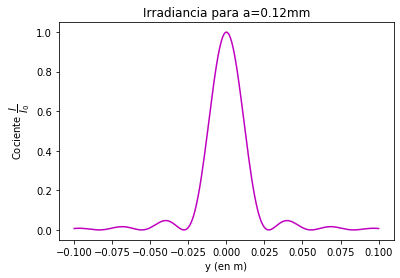

In [9]:
plt.plot(y,i1,'m')
plt.xlabel('y (en m)')
plt.ylabel('Cociente $\dfrac{I}{I_0}$')
plt.title('Irradiancia para a=0.12mm')
plt.show()

In [10]:
xx, yy = np.meshgrid(x,y)
beta1grid = beta1_fun(yy)
beta2grid = beta2_fun(yy)
beta3grid = beta3_fun(yy)
i1grid = intensity(beta1grid)
i2grid = intensity(beta2grid)
i3grid = intensity(beta3grid)

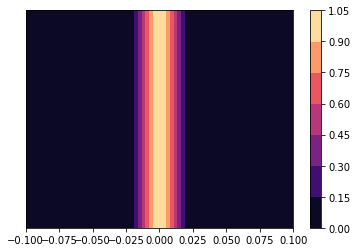

In [15]:
uwu = plt.contourf(yy,xx,i1grid,cmap='magma')
plt.colorbar(uwu)
plt.yticks([],[])
plt.show()

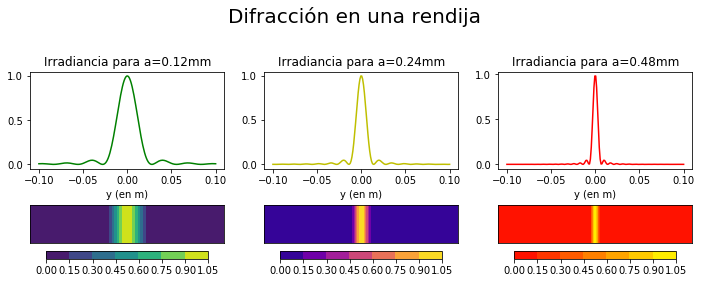

In [18]:
fig = plt.figure(figsize=(10,5))
ax11 = fig.add_axes([0.05,0.45,0.27,0.27])
ax12 = fig.add_axes([0.375,0.45,0.27,0.27])
ax13 = fig.add_axes([0.70,0.45,0.27,0.27])
ax21 = fig.add_axes([0.05,0.2,0.27,0.15])
ax22 = fig.add_axes([0.375,0.2,0.27,0.15])
ax23 = fig.add_axes([0.7,0.2,0.27,0.15])

fig.suptitle("Difracción en una rendija",y=0.9,fontsize=20)

#Irradiancia para a = 0.12mm
ax11.plot(y,i1,'g')
ax11.set_xticks([-0.1,-0.05,0,0.05,0.1])
ax11.set_xlabel('y (en m)')
ax11.set_title('Irradiancia para a=0.12mm')

ir1 = ax21.contourf(yy,xx,i1grid,cmap='viridis')
fig.colorbar(ir1, ax=ax21, orientation="horizontal")
ax21.axes.get_xaxis().set_visible(False)
ax21.axes.get_yaxis().set_visible(False)

#Irradiancia para a = 0.24mm
ax12.plot(y,i2,'y')
ax12.set_xticks([-0.1,-0.05,0,0.05,0.1])
ax12.set_xlabel('y (en m)')
ax12.set_title('Irradiancia para a=0.24mm')

ir2 = ax22.contourf(yy,xx,i2grid,cmap='plasma')
fig.colorbar(ir2, ax=ax22, orientation="horizontal")
ax22.axes.get_xaxis().set_visible(False)
ax22.axes.get_yaxis().set_visible(False)

#Irradiancia para a = 0.48mm
ax13.plot(y,i3,'r')
ax13.set_xticks([-0.1,-0.05,0,0.05,0.1])
ax13.set_xlabel('y (en m)')
ax13.set_title('Irradiancia para a=0.48mm')

ir3 = ax23.contourf(yy,xx,i3grid,cmap='autumn')
fig.colorbar(ir3, ax=ax23, orientation="horizontal")
ax23.axes.get_xaxis().set_visible(False)
ax23.axes.get_yaxis().set_visible(False)

plt.show()
fig.savefig("single_slit_diffraction.png")

## Abertura Circular

$$I = I_0 \left(\dfrac{2J_1(alpha)}{\alpha}\right)^2$$

$$\alpha = \dfrac{2\pi a\sin\theta}{\lambda}$$

$$\sin\theta = \dfrac{\sqrt{x^2+y^2}}{R}$$

Donde

$J_1(\alpha)$: Función de bessel de primer orden

a: Radio de la abertura

In [121]:
from scipy import special

In [153]:
ar = np.array([0.6e-3,1.2e-3,2.4e-3])
R = 528.2e-2
x2 = np.linspace(-2.5e-2,2.5e-2,200)
y2 = np.linspace(-2.5e-2,2.5e-2,200)

In [102]:
def alpha(a,lamb,R):
    return lambda x,y: (2*pi*a*(x**2+y**2)**(1/2))/(lamb*R)

In [103]:
alpha1_fun = alpha(ar[0],lamb,R)
alpha2_fun = alpha(ar[1],lamb,R)
alpha3_fun = alpha(ar[2],lamb,R)

In [154]:
r = (x2**2+y2**2)**(1/2)

In [155]:
alpha1 = alpha1_fun(x2,y2)
alpha2 = alpha2_fun(x2,y2)
alpha3 = alpha3_fun(x2,y2)

In [183]:
def intcirc(alpha):
    return (2*special.j1(alpha)/alpha)**2

In [184]:
ic1 = intcirc(alpha1)
ic2 = intcirc(alpha2)
ic3 = intcirc(alpha3)

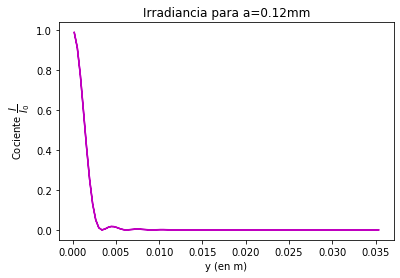

In [185]:
plt.plot(r,ic1,'m')
plt.xlabel('y (en m)')
plt.ylabel('Cociente $\dfrac{I}{I_0}$')
plt.title('Irradiancia para a=0.12mm')
plt.show()

In [186]:
xx2, yy2 = np.meshgrid(x2,y2)
alpha1grid = alpha1_fun(xx2,yy2)
alpha2grid = alpha2_fun(xx2,yy2)
alpha3grid = alpha3_fun(xx2,yy2)
ic1grid = intcirc(alpha1grid)
ic2grid = intcirc(alpha2grid)
ic3grid = intcirc(alpha3grid)

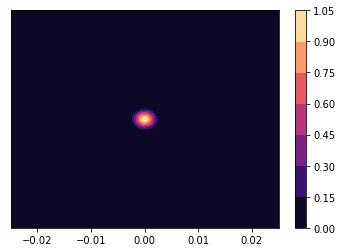

In [187]:
uwu2 = plt.contourf(xx2,yy2,ic1grid,cmap='magma')
plt.colorbar(uwu2)
plt.yticks([],[])
plt.show()

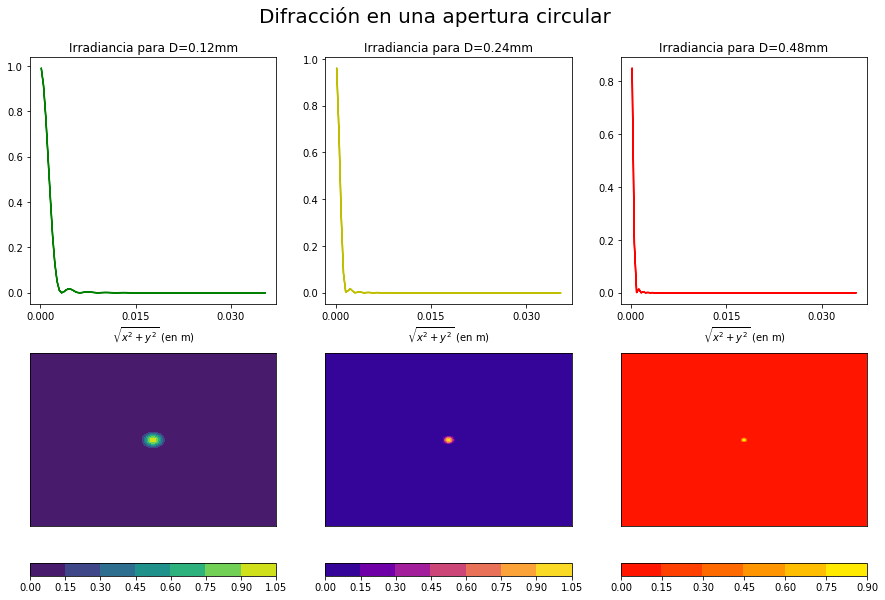

In [188]:
fig2, ([axc11,axc12,axc13],[axc21,axc22,axc23]) = plt.subplots(2,3,figsize=(15,10))

fig2.suptitle("Difracción en una apertura circular",y=0.95,fontsize=20)

#Irradiancia para a = 0.12mm
axc11.plot(r,ic1,'g')
axc11.set_xticks([0,0.015,0.030])
axc11.set_xlabel('$\sqrt{x^2+y^2}$ (en m)')
axc11.set_title('Irradiancia para D=0.12mm')

irc1 = axc21.contourf(xx2,yy2,ic1grid,cmap='viridis')
fig.colorbar(irc1, ax=axc21, orientation="horizontal")
axc21.axes.get_xaxis().set_visible(False)
axc21.axes.get_yaxis().set_visible(False)

#Irradiancia para a = 0.24mm
axc12.plot(r,ic2,'y')
axc12.set_xticks([0,0.015,0.030])
axc12.set_xlabel('$\sqrt{x^2+y^2}$ (en m)')
axc12.set_title('Irradiancia para D=0.24mm')

ir2 = axc22.contourf(xx2,yy2,ic2grid,cmap='plasma')
fig.colorbar(ir2, ax=axc22, orientation="horizontal")
axc22.axes.get_xaxis().set_visible(False)
axc22.axes.get_yaxis().set_visible(False)

#Irradiancia para a = 0.48mm
axc13.plot(r,ic3,'r')
axc13.set_xticks([0,0.015,0.030])
axc13.set_xlabel('$\sqrt{x^2+y^2}$ (en m)')
axc13.set_title('Irradiancia para D=0.48mm')

ir3 = axc23.contourf(xx2,yy2,ic3grid,cmap='autumn')
fig.colorbar(ir3, ax=axc23, orientation="horizontal")
axc23.axes.get_xaxis().set_visible(False)
axc23.axes.get_yaxis().set_visible(False)

plt.show()
fig.savefig("circ_apert_diffraction.png")